In [4]:
import pandas as pd  # data frame operations

import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# read in Dodgers bobbleheads data and create data frame
dodgers = pd.read_csv("dodgers.csv")

# examine the structure of the data frame
print("\nContents of dodgers data frame ---------------")

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# print the first five rows of the data frame
print(pd.DataFrame.head(dodgers))
dodgerDF = pd.DataFrame(dodgers)

mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))


Contents of dodgers data frame ---------------
  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
0   APR   10   56000     Tuesday  Pirates    67  Clear        Day  NO    NO   
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000  
0        NO         NO      56.000  
1        NO         NO      29.729  
2        NO         NO      28.328  
3       YES         NO      31.601  
4        NO         NO      46.549  


The average attendance per game is: 41040.0740741
We didnt have to chop anyone, much better: 41040.0


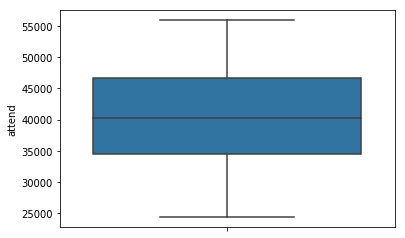

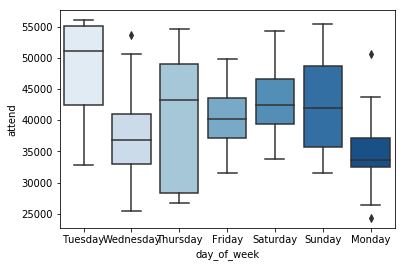

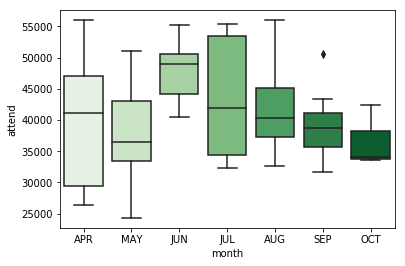

In [29]:
MeanDogAtt=np.mean(dodgers['attend'])
print "The average attendance per game is:", MeanDogAtt

#I dislike the remainder and would prefer to round, how do you count a "tenth" of a person?
#Con - Data could be hidden/lost through these conversions
PrettyDogAtt=np.around(MeanDogAtt, decimals=0, out=None)
print "We didnt have to chop anyone, much better:", PrettyDogAtt

#BoxPlot-1
sns.boxplot(y="attend", data=dodgers)
plt.show()
# Playing with Palettes for BoxPlot-2 & BoxPlot-3 
#BoxPlot-2-v2
sns.boxplot(x="day_of_week", y="attend", data=dodgers, palette="Blues");
plt.show()
#BoxPlot-3-v2
sns.boxplot(x="month", y="attend", data=dodgers, palette="Greens")
plt.show()
# To add legend consider "sns.pointplot"

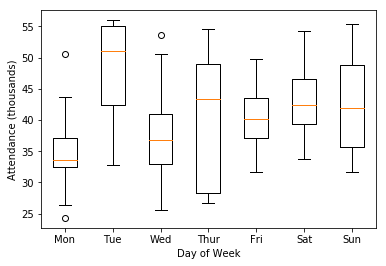

<Figure size 432x288 with 0 Axes>

In [26]:
# exploratory data analysis: box plot for day of the week
fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (in 000s)') #Playing with label - Should be "Thousands"
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
# Set Property on a object in this case "day_plot" boxplot
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
plt.show()
# Check this code as the PDF generated contains no data 
# Also is a security risk - Add UI element such as button to download
plt.savefig('fig_advert_promo_dodgers_eda_day_of_week_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 

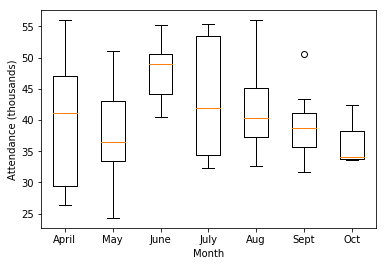

In [30]:
# exploratory data analysis: box plot for Month

april = dodgers[dodgers['month'] == 'APR']
may = dodgers[dodgers['month'] == 'MAY']
june = dodgers[dodgers['month'] == 'JUN']
july = dodgers[dodgers['month'] == 'JUL']
august = dodgers[dodgers['month'] == 'AUG']
september = dodgers[dodgers['month'] == 'SEP']
october = dodgers[dodgers['month'] == 'OCT']

data = [april['attend_000'], may['attend_000'], 
    june['attend_000'], july['attend_000'], 
    august['attend_000'], september['attend_000'], 
    october['attend_000']]
ordered_month_names = ['April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct']

fig, axis = plt.subplots()
axis.set_xlabel('Month')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_month_names)
plt.show()

# Play with the file save feature as in it's current form is not functional

## CODE TO SAVE IMAGE FILE
# plt.savefig('fig_advert_promo_dodgers_eda_month_Python.pdf', 
#    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
#    orientation='portrait', papertype=None, format=None, 
#    transparent=True, pad_inches=0.25, frameon=None)  

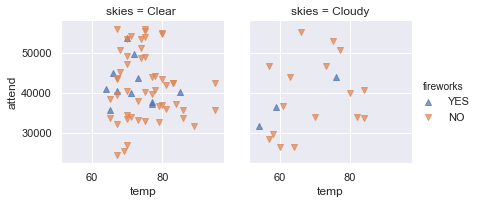

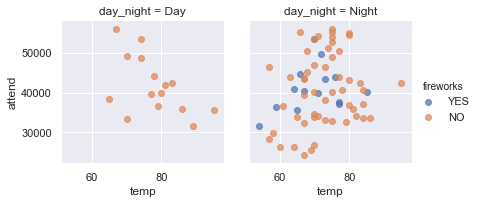

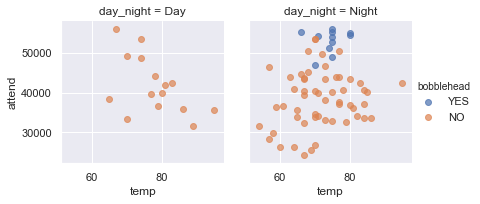

In [32]:
# trellis/lattice plot attendance by temp, conditioning on skies 
# and day_night with bobblehead NO/YES shown in distinct colors
import seaborn as sns

# There a whole variety of styles and ticks
sns.set(style="darkgrid")

g = sns.FacetGrid(dodgers, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

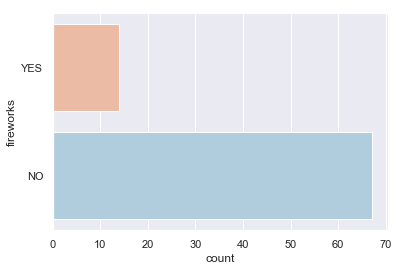

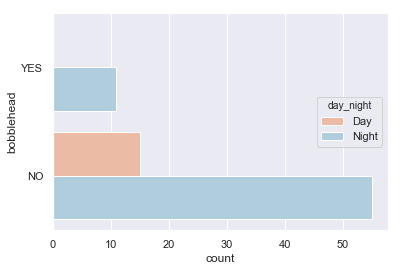

In [35]:
# PROMOTIONS BY TYPE

# Does the color palette impact the ease of interpretation?

sns.countplot(y="fireworks", data=dodgers, palette="RdBu",
             order=["YES", "NO"])
g.add_legend();

# REMOVE THE SNS - original was sns.plt.show
plt.show()

sns.countplot(y="bobblehead", hue="day_night",
                data=dodgers, palette="RdBu",
                order=["YES", "NO"])
g.add_legend();
plt.show()

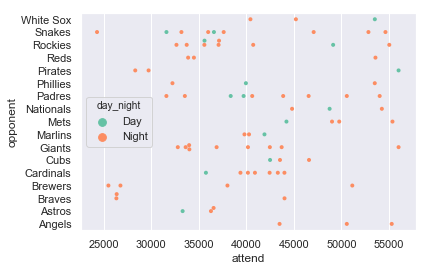

In [45]:
# Dodgers attendance by Visiting Team

# teams = sorted(["opponent"], reverse=True)
# size only impacts the size of the point
# playing with palette again
sns.swarmplot(x="attend", y="opponent", hue="day_night", 
              data=dodgers, order =ordered_team_names, palette="Set2", size=4 )
g.add_legend();
plt.show()

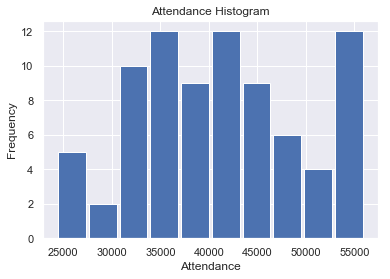

In [47]:
# CREATE A HISTOGRAM OF ATTENDANCE

# CREATE BINS

# Recieved a warning on the normed kwarg and should use density kwarg
# plt.hist(dodgers['attend'], normed = False, stacked = False, rwidth = .9)
plt.hist(dodgers['attend'], density = False, stacked = False, rwidth = .9)
plt.title("Attendance Histogram")
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.show()

In [48]:
# BLOCK FOR ORDERING DATA

# map day_of_week to ordered_day_of_week 
day_to_ordered_day = {'Monday' : '1Monday', 
    'Tuesday' : '2Tuesday', 
    'Wednesday' : '3Wednesday', 
    'Thursday' : '4Thursday', 
    'Friday' : '5Friday',
    'Saturday' : '6Saturday',
    'Sunday' : '7Sunday'}
dodgers['ordered_day_of_week'] = dodgers['day_of_week'].map(day_to_ordered_day)   

# map month to ordered_month
month_to_ordered_month = {'APR' : '1April', 
     'MAY' : '2May', 
     'JUN' : '3June', 
     'JUL' : '4July', 
     'AUG' : '5Aug',
     'SEP' : '6Sept',
     'OCT' : '7Oct'}
dodgers['ordered_month'] = dodgers['month'].map(month_to_ordered_month)    

In [56]:
# employ training-and-test regimen for model validation
np.random.seed(1234)
dodgers['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(dodgers))
dodgers_train = dodgers[dodgers['runiform'] >= 0.33]
dodgers_test = dodgers[dodgers['runiform'] < 0.33]
# check training data frame
# Because this is running in jupyter are more liberal with the print statements 
print "" # The formatting is wearing my eyes needed to add another line for readability
print "Dodgers training data frame (rows,columns):" ,dodgers_train.shape
print ""
print(dodgers_train.head())
print ""
# check test data frame
print ""
print "Dodgers test data frame (rows,columns):", dodgers_test.shape
print ""
print(dodgers_test.head())
print ""
# specify a simple model with bobblehead entered last
# similar to GLM in R
# implemented via a string
my_model = str('attend ~ ordered_month + ordered_day_of_week + bobblehead')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = dodgers_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())
# training set predictions from the model fit to the training set
dodgers_train['predict_attend'] = train_model_fit.fittedvalues

# test set predictions from the model fit to the training set
dodgers_test['predict_attend'] = train_model_fit.predict(dodgers_test)

#Ignore the warnings at the end


Dodgers training data frame (rows,columns): (57, 16)

  month  day  attend day_of_week opponent  temp   skies day_night cap shirt  \
1   APR   11   29729   Wednesday  Pirates    58  Cloudy     Night  NO    NO   
2   APR   12   28328    Thursday  Pirates    57  Cloudy     Night  NO    NO   
3   APR   13   31601      Friday   Padres    54  Cloudy     Night  NO    NO   
4   APR   14   46549    Saturday   Padres    57  Cloudy     Night  NO    NO   
7   APR   24   44014     Tuesday   Braves    63  Cloudy     Night  NO    NO   

  fireworks bobblehead  attend_000 ordered_day_of_week ordered_month  runiform  
1        NO         NO      29.729          3Wednesday        1April  0.622109  
2        NO         NO      28.328           4Thursday        1April  0.437728  
3       YES         NO      31.601             5Friday        1April  0.785359  
4        NO         NO      46.549           6Saturday        1April  0.779976  
7        NO         NO      44.014            2Tuesday        1Ap

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [63]:
# compute the proportion of response variance
# accounted for when predicting out-of-sample
print "\nProportion of Test Set Variance Accounted for:" ,\
    round(np.power(dodgers_test['attend'].corr(dodgers_test['predict_attend']),2),3)
print ""
# use the full data set to obtain an estimate of the increase in
# attendance due to bobbleheads, controlling for other factors 
my_model_fit = smf.ols(my_model, data = dodgers).fit()
print(my_model_fit.summary())

#Cleaned up print
print"Estimated Effect of Bobblehead Promotion on Attendance: ",\
    round(my_model_fit.params[13],0)


Proportion of Test Set Variance Accounted for: 0.217

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     6.158
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           2.08e-07
Time:                        22:55:43   Log-Likelihood:                -813.52
No. Observations:                  81   AIC:                             1655.
Df Residuals:                      67   BIC:                             1689.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------